In [4]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.base import clone
from my_tree import *

In [7]:
#Load Data and store it into pandas DataFrame objects
wine = load_wine()
X = pd.DataFrame(wine.data[:, :], columns=wine.feature_names[:])
# print(X)

In [8]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [11]:
# preprocessing 1 - Feature scaling
# rescale a range between an arbitrary set of values [a, b] where a=-1, b=1
scaler = MinMaxScaler(feature_range=(-1, 1)) # build the scaler model
X_rescaled_features = scaler.fit_transform(X) 
X_rescaled_features = pd.DataFrame(X_rescaled_features[:, :], columns=wine.feature_names[:])
X_rescaled_features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.684211,-0.616601,0.144385,-0.484536,0.239130,0.255172,0.147679,-0.433962,0.186120,-0.255973,-0.089431,0.941392,0.122682
1,0.142105,-0.588933,-0.165775,-0.938144,-0.347826,0.151724,0.021097,-0.509434,-0.451104,-0.470990,-0.073171,0.560440,0.101284
2,0.121053,-0.359684,0.401070,-0.175258,-0.326087,0.255172,0.223629,-0.358491,0.514196,-0.249147,-0.105691,0.391941,0.293866
3,0.757895,-0.521739,0.219251,-0.360825,-0.065217,0.979310,0.329114,-0.584906,0.116719,0.112628,-0.382114,0.597070,0.714693
4,0.163158,-0.268775,0.614973,0.072165,0.043478,0.255172,-0.008439,-0.018868,-0.110410,-0.481229,-0.089431,0.216117,-0.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.410526,0.940711,0.165775,0.020619,-0.456522,-0.517241,-0.886076,0.471698,-0.589905,0.095563,-0.739837,-0.655678,-0.340942
174,0.247368,0.252964,0.197861,0.278351,-0.304348,-0.434483,-0.827004,0.132075,-0.369085,0.027304,-0.642276,-0.787546,-0.326676
175,0.178947,0.399209,-0.037433,-0.030928,0.086957,-0.579310,-0.852321,0.132075,-0.406940,0.522184,-0.821138,-0.787546,-0.205421
176,0.126316,-0.268775,0.080214,-0.030928,0.086957,-0.537931,-0.856540,0.509434,-0.337539,0.368601,-0.804878,-0.743590,-0.198288


In [16]:
Y = pd.DataFrame(wine.target, columns=["Species"])
# Species are class_0,class_1,class_2
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [27]:
# Train the model on the data
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled_features, Y, test_size=0.5)

In [28]:
# Now let's fit a DecisionTreeClassifier instance
Dtree = DecisionTreeClassifier(max_depth=5)
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
Dtree.score(X_test, Y_test)

0.9213483146067416

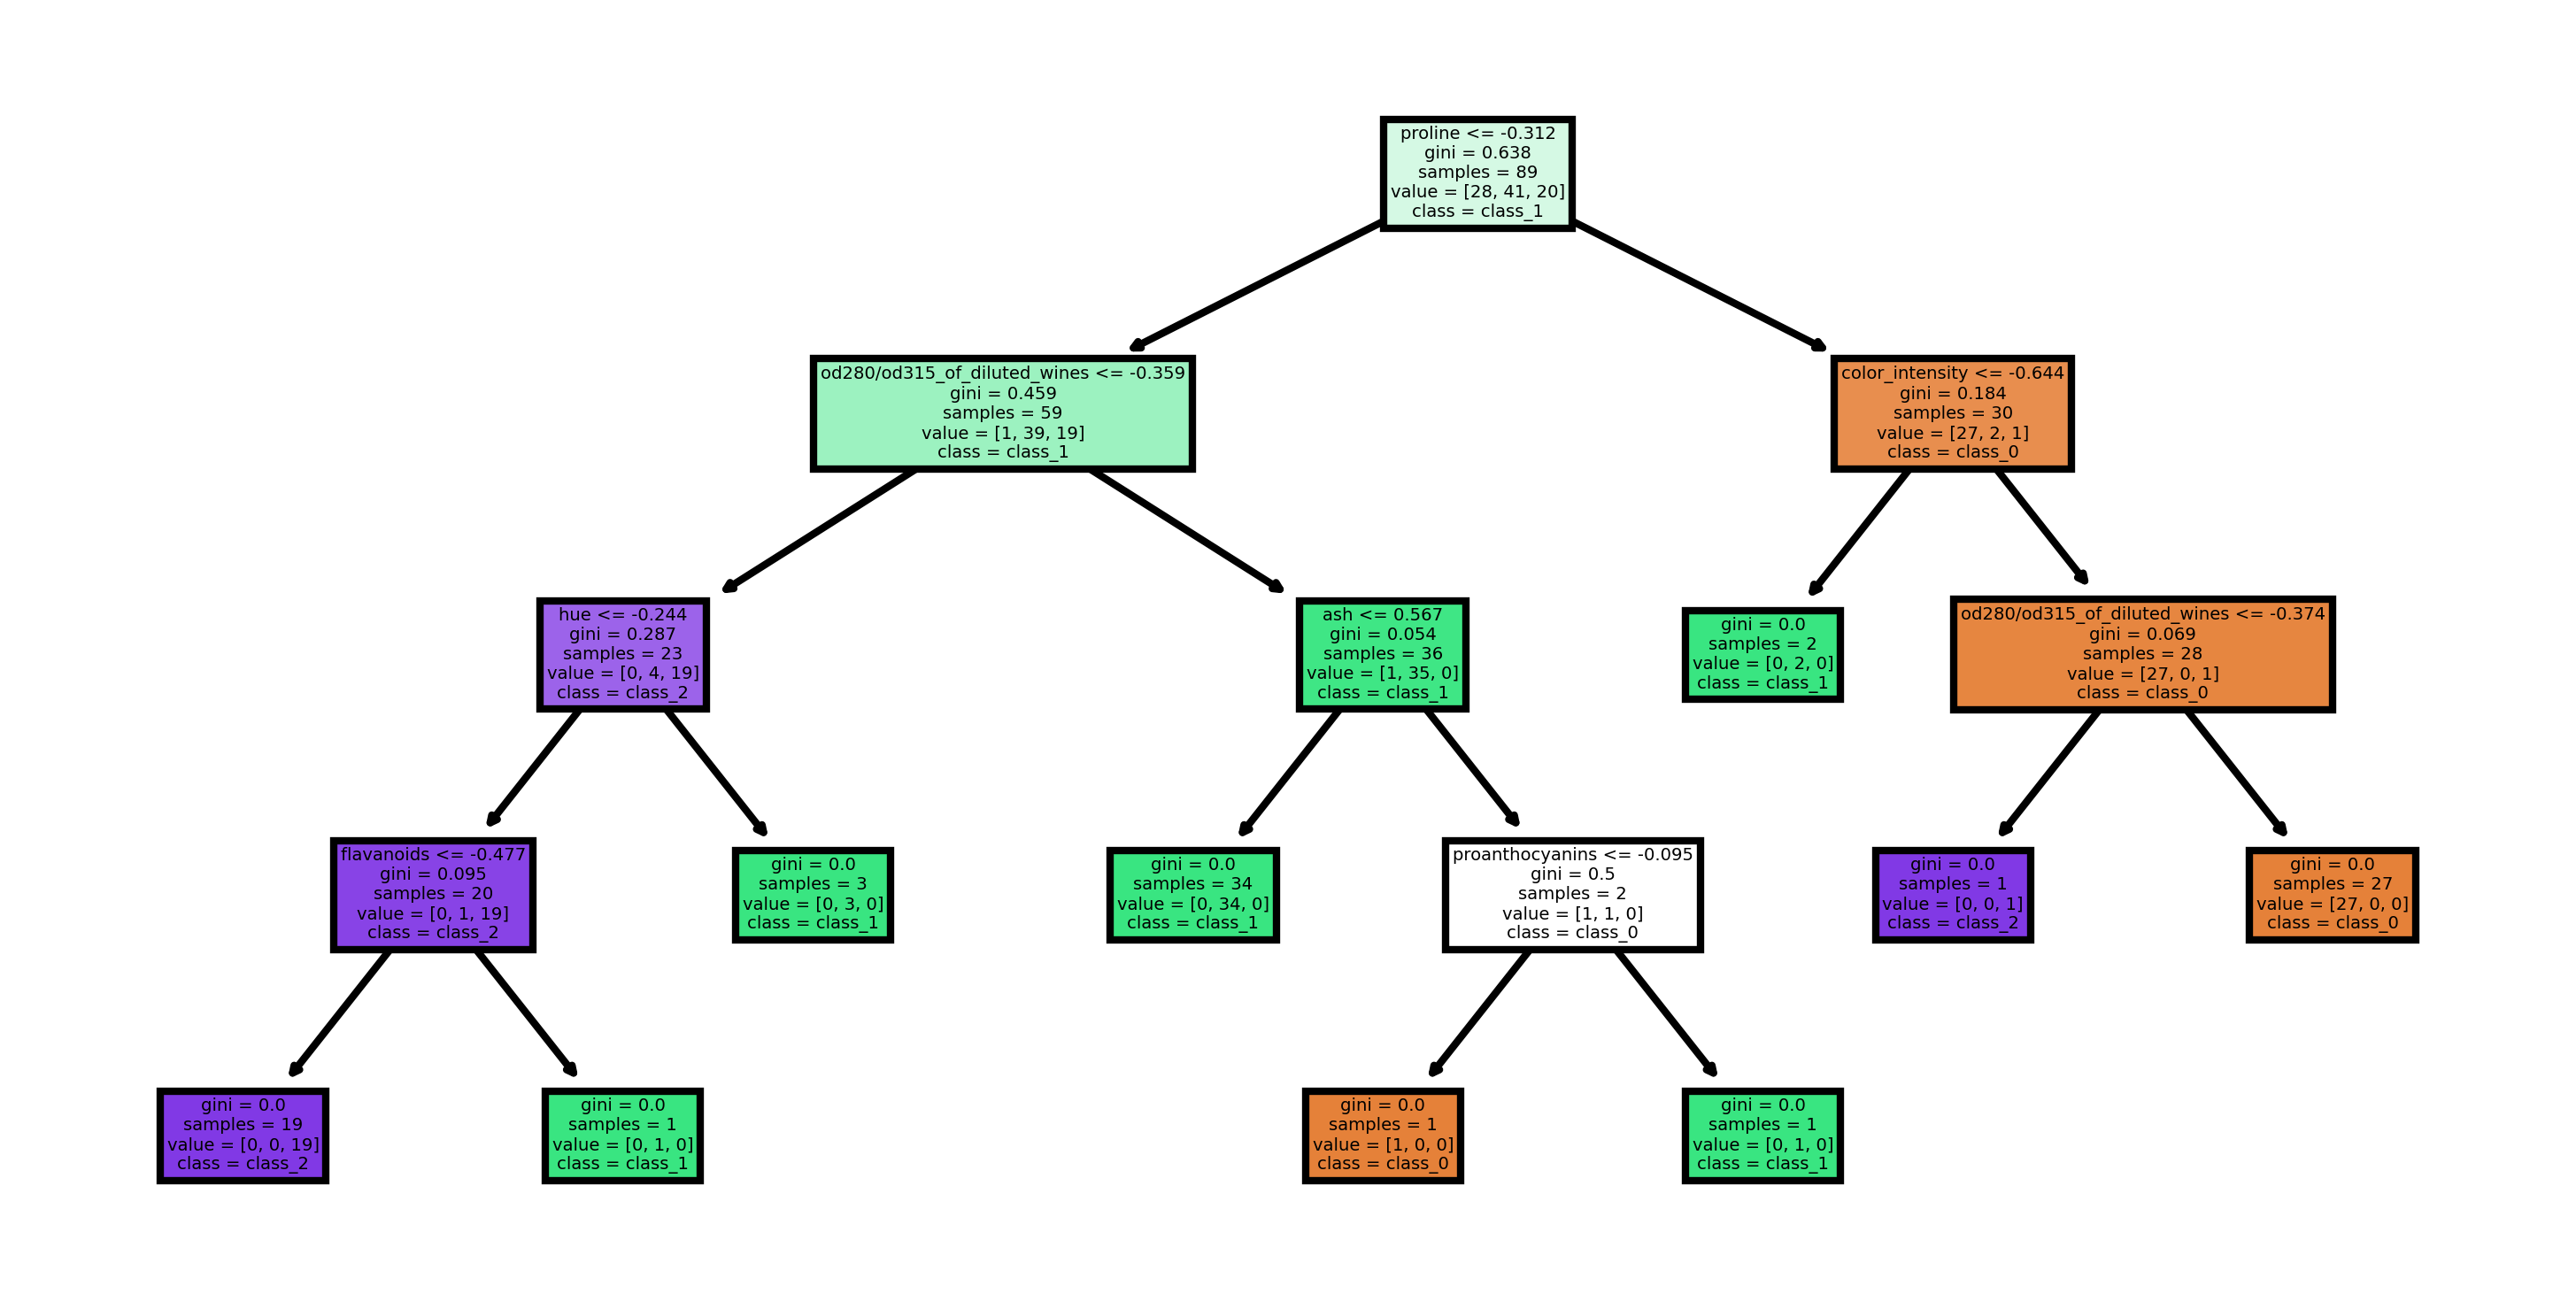

In [58]:
fn=['alcohol','malic_acid','ash','alcalinity_of_ash', 'magnesium', 'total_phenols' ,'flavanoids' ,'nonflavanoid_phenols' ,'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
cn=['class_0', 'class_1', 'class_2']

# Setting dpi = 300 to make image clearer than default
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=600)
tree.plot_tree(Dtree,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [60]:
# numpy.linspace(start, stop, num_of_samples); Returns num evenly spaced samples,
# calculated over the interval [start, stop]
X = np.linspace(-2, 2, num=401)

# concatenate((a1, a2, ...), axis=0); combines NumPy arrays together
# axis=None => arrays are flattened before use.
y1 = np.zeros(200)
y2 = np.ones(1)
y3 = np.ones(200)
Y = np.concatenate((y1, y2, y3), axis=None)

In [61]:
# weights functions
w1 = np.concatenate(((2 / 7) * (np.ones(150)), np.zeros(101)), axis=None)

# 7/2 is godel of range [0.25,2] + [-2,-0.25]
# the first 150 values ([-2,0.25]) have a weight of 2/7
# the next 101 values ([-0.25,0.25]) have a weight of 0
# the last 150 values ([0.25,2]) have a weight of 2/7
# weight = np.concatenate((partW1, (2/7)*np.ones(75)), axis=None)
w2 = (2 / 7) * np.ones(150)
weight = np.concatenate((w1, w2), axis=None)

In [62]:
# we use the above function in polyfit to help calculate the polynome
# polyfit(x, y, deg, w); least square polynomial fit
pf = np.polyfit(X, Y, 32, w=weight)
# print(pf)
# poly1d(c_or_r); The polynomial’s coefficients in decreasing powers
phi = np.poly1d(pf)
print(phi)

            32             31             30            29
-6.915e-10 x  - 5.221e-05 x  + 2.342e-08 x  + 0.001771 x 
              28           27             26          25             24
 - 3.623e-07 x  - 0.02743 x  + 3.392e-06 x  + 0.2572 x  - 2.145e-05 x 
          23             22         21             20         19
 - 1.631 x  + 9.692e-05 x  + 7.391 x  - 0.0003228 x  - 24.71 x 
             18         17            16         15            14
 + 0.000806 x  + 62.01 x  - 0.001519 x  - 117.6 x  + 0.002159 x 
          13            12         11            10         9
 + 168.8 x  - 0.002298 x  - 181.9 x  + 0.001805 x  + 145.5 x
            8         7             6        5             4         3
 - 0.00102 x - 84.61 x + 0.0003994 x + 34.8 x - 0.0001018 x - 9.861 x
              2
 + 1.502e-05 x + 2.186 x + 0.5


In [63]:
DT = builtTree(Dtree)
printTree(DT)

 feature =  12 threshold =  -0.3124108463525772
     feature =  11 threshold =  -0.3589743673801422
         feature =  10 threshold =  -0.24390244483947754
             feature =  6 threshold =  -0.4767932593822479
                 leaf =  [0. 0. 1.]
                 leaf =  [0. 1. 0.]
             leaf =  [0. 1. 0.]
         feature =  2 threshold =  0.5668449103832245
             leaf =  [0. 1. 0.]
             feature =  8 threshold =  -0.09463722258806229
                 leaf =  [1. 0. 0.]
                 leaf =  [0. 1. 0.]
     feature =  9 threshold =  -0.644197940826416
         leaf =  [0. 1. 0.]
         feature =  11 threshold =  -0.3736263830214739
             leaf =  [0. 0. 1.]
             leaf =  [1. 0. 0.]


In [64]:
def Tree_Predict(T, x, depth=0):
    if T is None:
        return

    feature, threshold, leaf, left, right = T.getNode()

    if isinstance(leaf, np.ndarray):
        # print(depth * ' ', 'leaf = ', leaf)
        return leaf
    else:
        # print('phi1=', p(data[feature] - threshold))
        # print('phi2=', p(threshold - data[feature]))
        return (phi(x[feature] - threshold)) * Tree_Predict(right, x, depth + 4) + (
            phi(threshold - x[feature])) * Tree_Predict(left, x, depth + 4)

In [65]:
def predict(T, x):
    pred_vec = Tree_Predict(T, x)
    print(pred_vec)
    lenHot = len(pred_vec)
    l = np.argmax(pred_vec)
    leaf = np.zeros(lenHot)
    leaf[l] = 1
    return leaf

In [71]:
data =[-0.33,-0.8, 0.9, -0.07,-0.33,-0.8, 0.9, -0.07,-0.33,-0.8, 0.9, -0.07,-0.1]
print(predict(DT, data))
sample_data1 = int(Dtree.predict([data]))
print(wine.target_names[sample_data1])

[0.26251952 0.73066889 0.00680927]
[0. 1. 0.]
class_1


In [72]:
data =[-0.33,-0.8, 0.9, -0.07,-0.33,-0.8, 0.9, -0.07,-0.33, 0.8, 0.9, -0.07,-0.1]
print(predict(DT, data))
sample_data1 = int(Dtree.predict([data]))
print(wine.target_names[sample_data1])

[0.94636139 0.01848771 0.03514946]
[1. 0. 0.]
class_0


In [94]:
data =[0.631579, 0.328063, 0.475936, 0.432990, -0.434783, -0.262069, -0.822785, 0.622642, -0.406940, 0.351536, -0.788618, -0.758242, -0.597718]
print(predict(DT, data))
sample_data1 = int(Dtree.predict([data]))
print(wine.target_names[sample_data1])

[0.0026593  0.02460565 0.97273426]
[0. 0. 1.]
class_2
